# **Mushroom Edibility Study**

## Objectives

* Answer business requirement 1:
    * The client would like to better understand the patterns in the mushroom database so that the client can learn the variables of an mushroom most likely to be edible. 

## Inputs

* outputs/datasets/collection/mushrooms.csv

## Outputs

* Generate code and seaborn plots that answer business requirement 1 and can be used for the Streamlit App


---

# Change working directory

* Need to change working directory from the current jupyter_notebooks folder to the parent folder in order to access the whole project

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/creditcard-churn/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/creditcard-churn'

# Load Data

Load in the dataset to a dataframe, dropping redundant columns.

In [4]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/mushrooms.csv").drop(['Unnamed: 0'], axis=1)
df.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m


# Data Exploration #

We wish to become familiar with the dataset, check variable types and their distribution, check for any missing data, and to understand what these variables mean in the business context

In [6]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

`veil-type` is a clearly redundant variable, as all mushrooms in the dataset have the same value, 'p' - partial. As such it will be dropped.

In [7]:
df = df.drop(['veil-type'], axis=1)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


---

# Correlation study

We can use `OrdinalEncoder` to transform categorical variables into integer values, so they may be numerically correlated to `class`. This is used over `OneHotEncoder`, as the dataset has a large number of categorical variables, thus one-hot encoding would result in a dataset with too many columns, many of which would be redundant. Firstly, determining the categeorical variables in the dataset, and storing their labels in a string:

In [9]:
cols = df.columns[df.dtypes=='object'].to_list()
df_oe = df.copy()

cat_string=""

for col in cols:
    print(col)
    print(df[col].unique())
    cat_string += str(df[col].unique())+"\n"

cap-shape
['x' 'b' 's' 'f' 'k' 'c']
cap-surface
['s' 'y' 'f' 'g']
cap-color
['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises
['t' 'f']
odor
['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment
['f' 'a']
gill-spacing
['c' 'w']
gill-size
['n' 'b']
gill-color
['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape
['e' 't']
stalk-root
['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring
['s' 'f' 'k' 'y']
stalk-surface-below-ring
['s' 'f' 'y' 'k']
stalk-color-above-ring
['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring
['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-color
['w' 'n' 'o' 'y']
ring-number
['o' 't' 'n']
ring-type
['p' 'e' 'l' 'f' 'n']
spore-print-color
['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population
['s' 'n' 'a' 'v' 'y' 'c']
habitat
['u' 'g' 'm' 'd' 'p' 'w' 'l']


In order to pass these categories to the ordinal encoder, `my_string` will be used to extract the text from the list.

In [10]:
print(str(cat_string.split('\n')[:-1]).replace('"', '').replace("' ", "',").replace('],', '],\n'))

[['x','b','s','f','k','c'],
 ['s','y','f','g'],
 ['n','y','w','g','e','p','b','u','c','r'],
 ['t','f'],
 ['p','a','l','n','f','c','y','s','m'],
 ['f','a'],
 ['c','w'],
 ['n','b'],
 ['k','n','g','p','w','h','u','e','b','r','y','o'],
 ['e','t'],
 ['e','c','b','r','?'],
 ['s','f','k','y'],
 ['s','f','y','k'],
 ['w','g','p','n','b','e','o','c','y'],
 ['w','p','g','b','n','e','y','o','c'],
 ['w','n','o','y'],
 ['o','t','n'],
 ['p','e','l','f','n'],
 ['k','n','u','h','w','r','o','y','b'],
 ['s','n','a','v','y','c'],
 ['u','g','m','d','p','w','l']]


The above can then be copied into the definition of `cat_list` for input into the `categories` argument of `OrdinalEncoder`. The `ring-number` variable has an obvious ordering that would follow from its definition (n=0, o=1, t=2), so the order of its values will be changed such that the encoder will reflect that.

In [32]:
from sklearn.preprocessing import OrdinalEncoder

cat_list = [['c','k','f','x','s','b'],
            ['s','y','f','g'],
            ['n','y','w','g','e','p','b','u','c','r'],
            ['t','f'],
            ['n','p','a','l','f','c','y','s','m'],
            ['f','a'],
            ['c','w'],
            ['n','b'],
            ['k','n','g','p','w','h','u','e','b','r','y','o'],
            ['e','t'],
            ['e','c','b','r','?'],
            ['s','f','k','y'],
            ['s','f','y','k'],
            ['w','g','p','n','b','e','o','c','y'],
            ['w','p','g','b','n','e','y','o','c'],
            ['w','n','o','y'],
            ['n','o','t'],
            ['p','e','l','f','n'],
            ['k','n','u','h','w','r','o','y','b'],
            ['s','n','a','v','y','c'],
            ['u','g','m','d','p','w','l']]

encoder = OrdinalEncoder(categories=cat_list)
encoded_array = encoder.fit_transform(df[cols])

for i, col in enumerate(cols):
    df_oe[col] = encoded_array[:,i]

df_oe.head(3)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,3.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0
2,1,5.0,0.0,2.0,0.0,3.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0


We now repeat the correlation methods for the dataset with the usage and redundant variables dropped

In [31]:
corr_spearman = df_oe.corr(method='spearman')['class'].sort_values(key=abs, ascending=False)[1:]
corr_spearman

odor                       -0.857140
ring-type                  -0.579335
spore-print-color          -0.555944
gill-size                   0.540024
stalk-surface-above-ring   -0.536555
bruises                    -0.501530
stalk-surface-below-ring   -0.500008
gill-color                 -0.399424
gill-spacing                0.348387
stalk-root                 -0.341438
stalk-color-above-ring     -0.274880
habitat                    -0.219755
ring-number                 0.214119
cap-shape                   0.180816
stalk-color-below-ring     -0.180483
cap-surface                 0.168950
veil-color                  0.140229
gill-attachment             0.129200
stalk-shape                 0.102019
population                 -0.086564
cap-color                  -0.058920
Name: class, dtype: float64

In [27]:
corr_pearson = df_oe.corr(method='pearson')['class'].sort_values(key=abs, ascending=False)[1:]
corr_pearson

odor                       -0.822423
spore-print-color          -0.560715
ring-type                  -0.556515
stalk-surface-above-ring   -0.552044
gill-size                   0.540024
stalk-surface-below-ring   -0.532452
bruises                    -0.501530
gill-color                 -0.412869
gill-spacing                0.348387
stalk-root                 -0.337542
cap-shape                   0.225457
stalk-color-above-ring     -0.225294
ring-number                 0.214366
habitat                    -0.191297
cap-surface                 0.169663
population                 -0.155254
gill-attachment             0.129200
veil-color                  0.120766
stalk-shape                 0.102019
stalk-color-below-ring     -0.098476
cap-color                  -0.042028
Name: class, dtype: float64

It appears that there are few categories that have strong correlation to whether the mushrooms are edible or poisonous, with the strongest being `odor` with its correlation coefficient being -0.77 when calculated by the Spearman method, -0.58 when calculated by Pearson. Of course, as there are no explicitly numerical variables in this dataset, the meaning of these correlation coefficients does not show

In [14]:
top_n = 5
set(corr_pearson[:top_n].index.to_list() + corr_spearman[:top_n].index.to_list())

{'gill-size',
 'odor',
 'ring-type',
 'spore-print-color',
 'stalk-surface-above-ring'}

Therefore we will study the following variables. We will investigate if:

* 

In [21]:
# vars_to_study = ['gill-size', 'odor', 'ring-type', 'spore-print-color', 'stalk-surface-above-ring']
vars_to_study = cols
vars_to_study

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

---

# EDA on selected variables

In [22]:
df_eda = df.filter(vars_to_study + ['class'])
df_eda.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,w,o,p,k,s,u,0
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,w,o,p,n,n,g,1
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,w,o,p,n,n,m,1
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,w,o,p,k,s,u,0
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,w,o,e,n,a,g,1


## Variables Distibution by Attrition

Plot the distributions (numerical and categorical) coloured by attrition

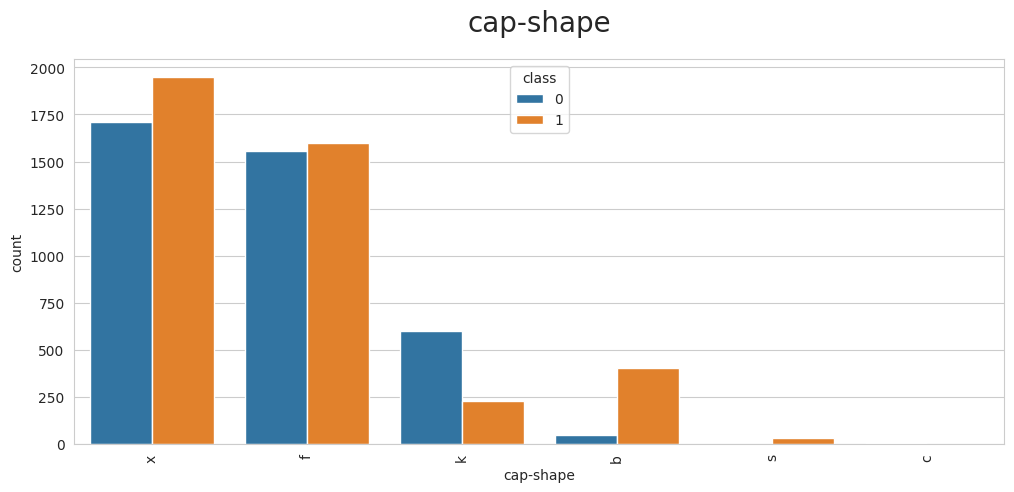

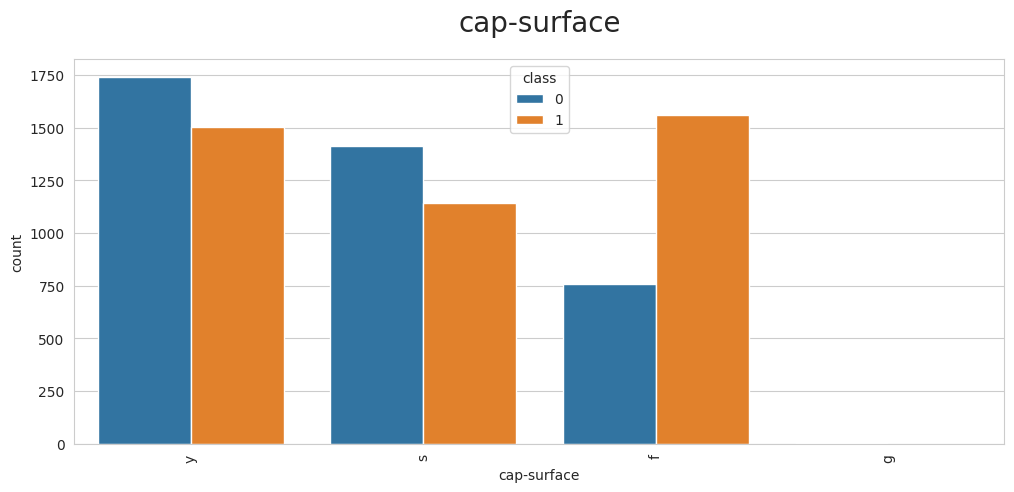

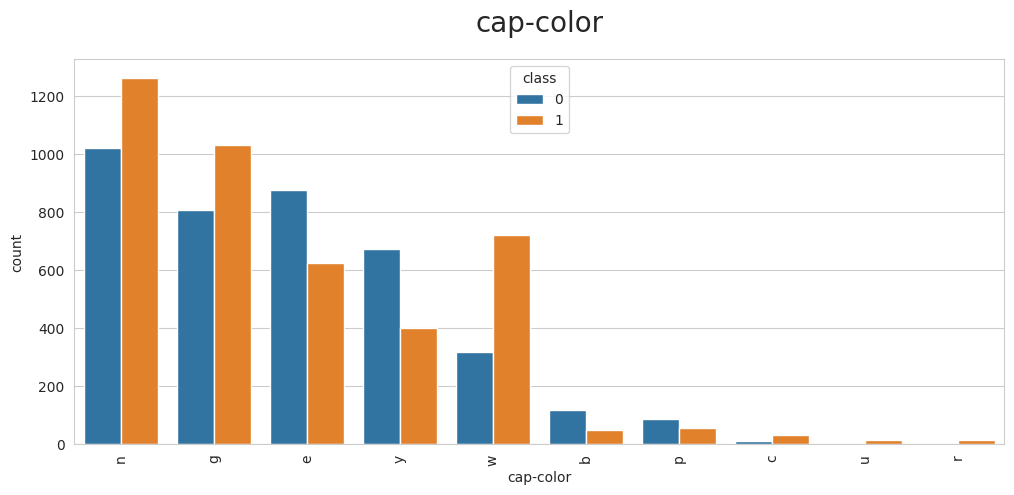

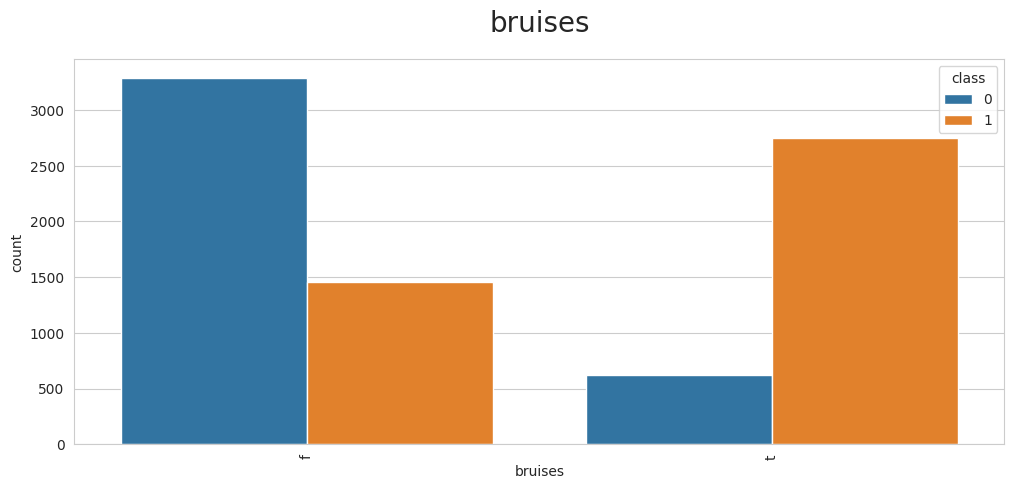

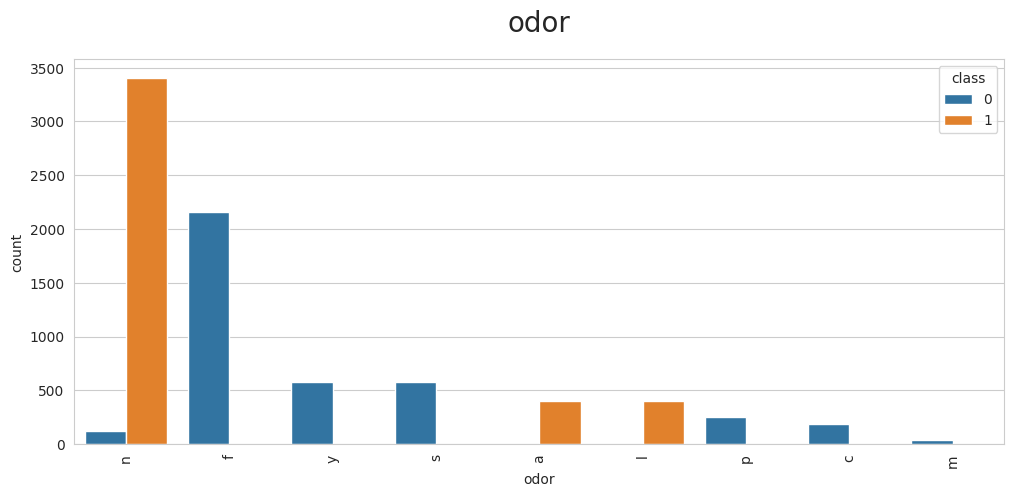

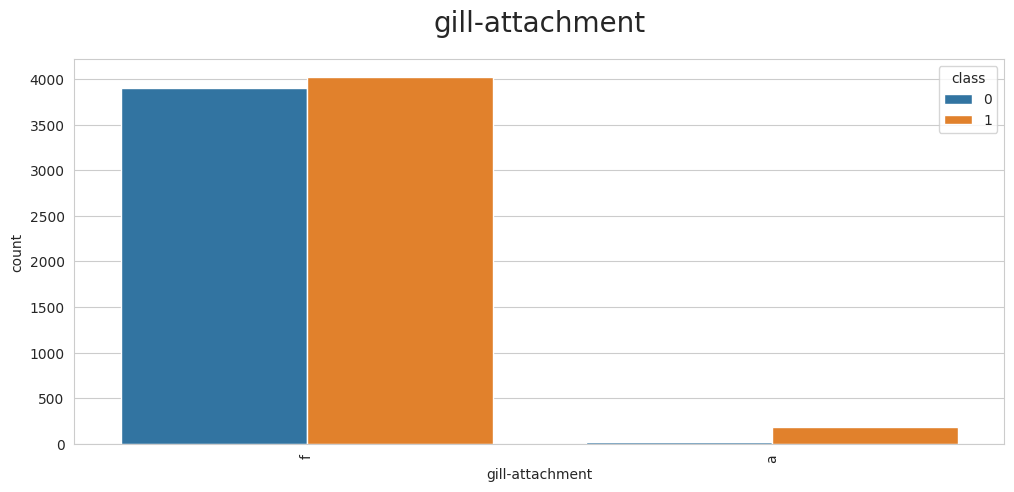

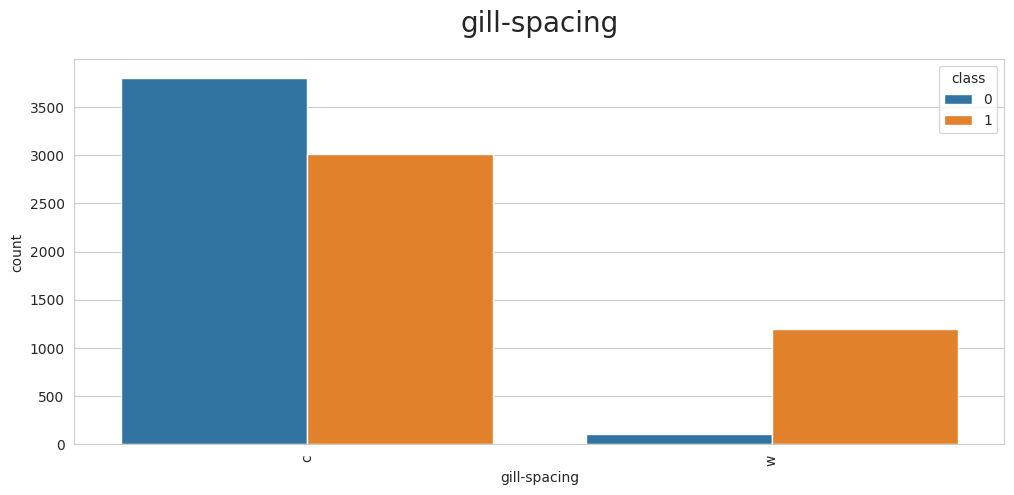

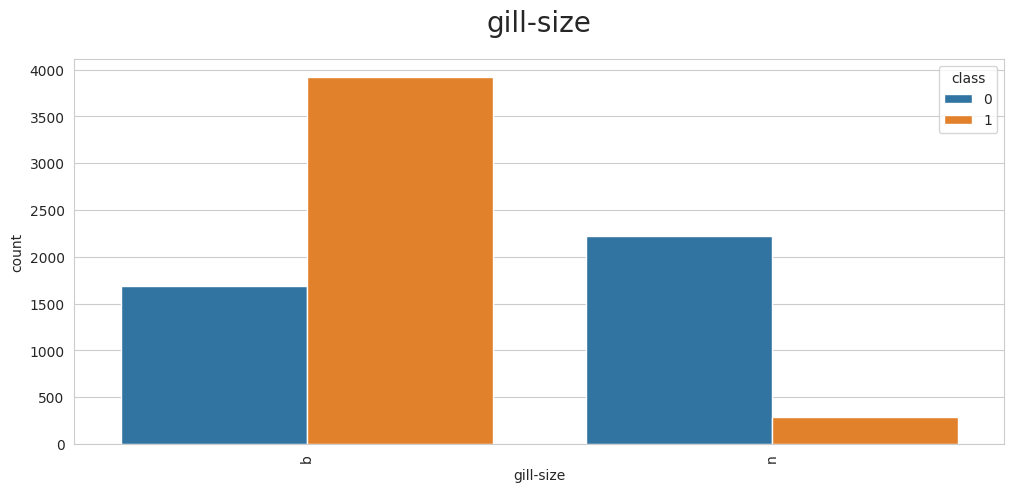

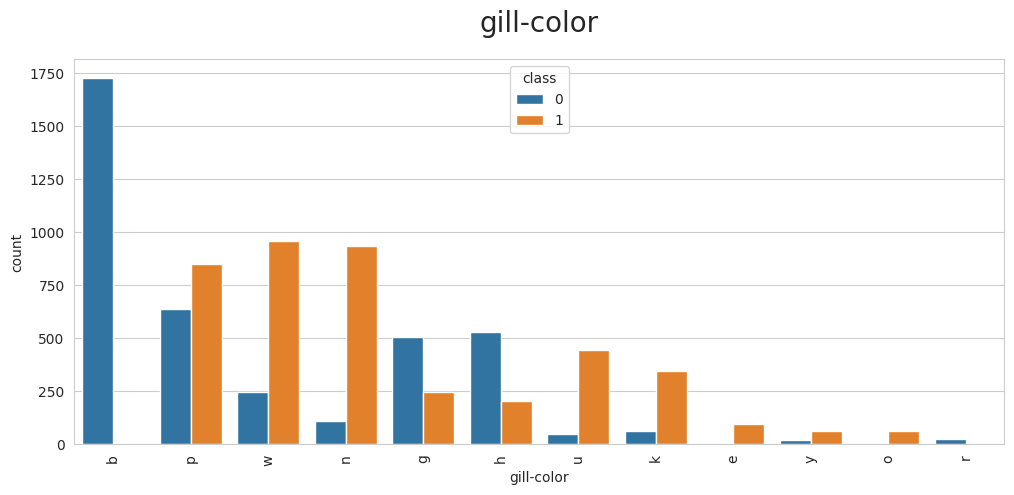

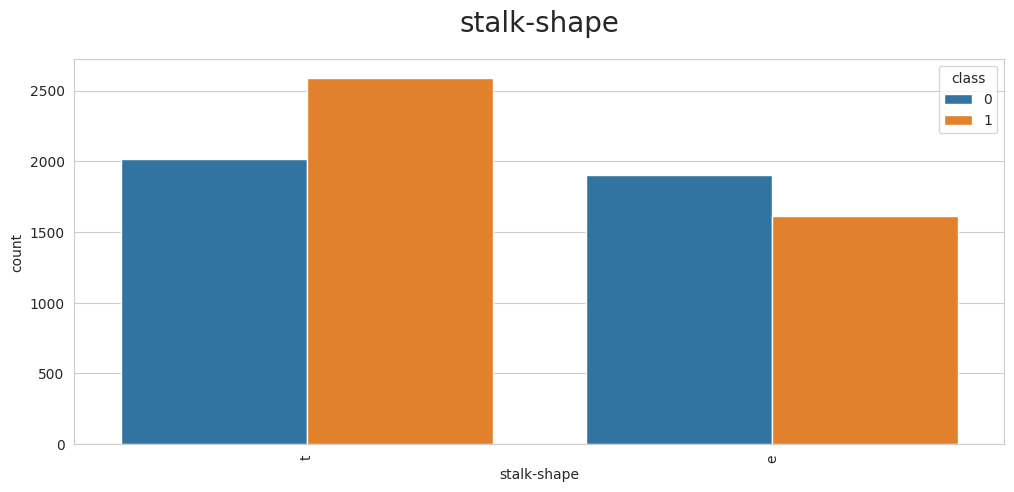

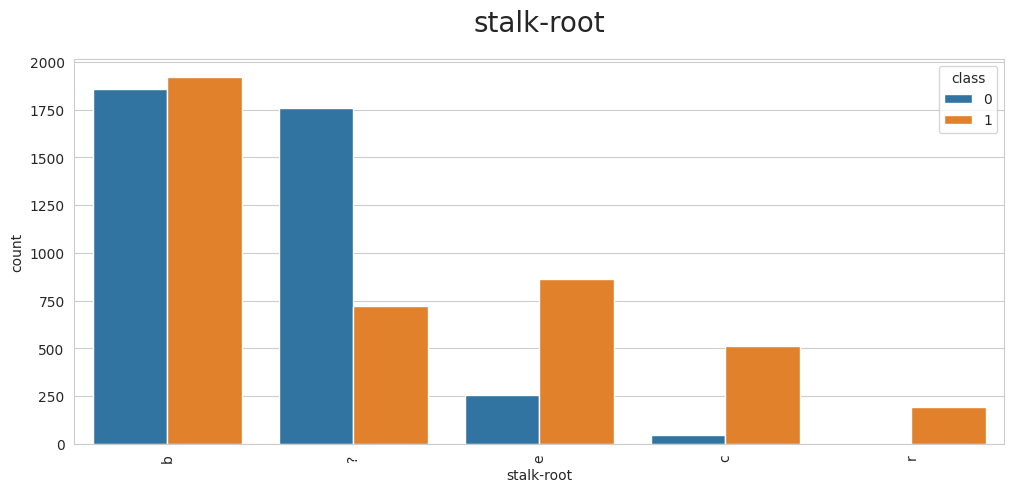

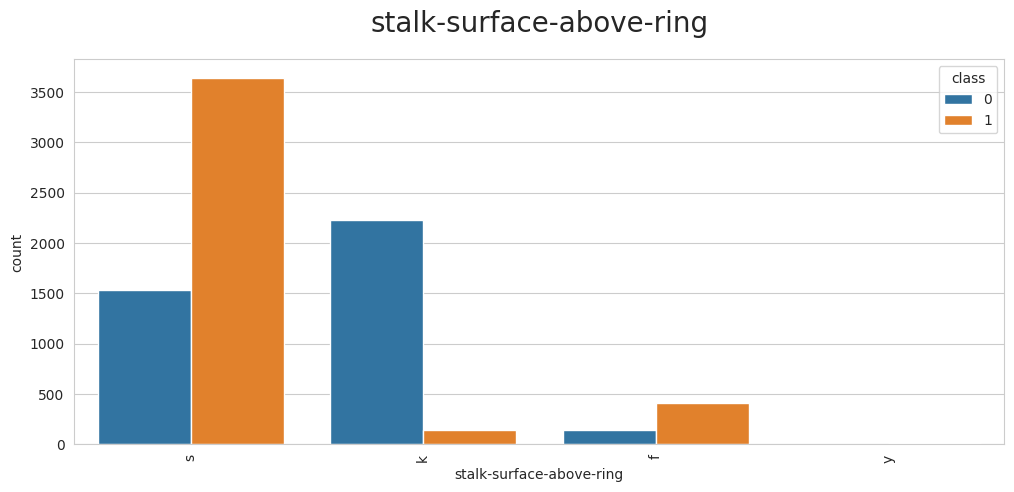

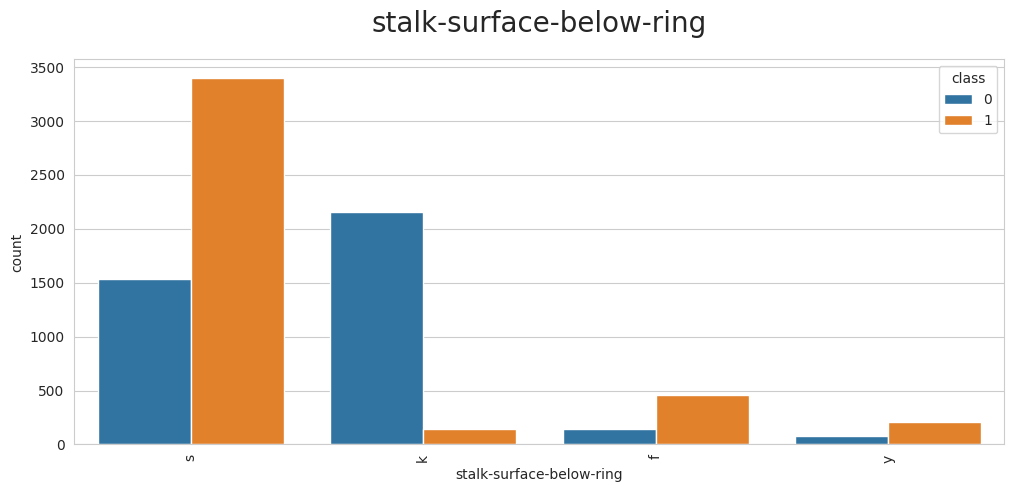

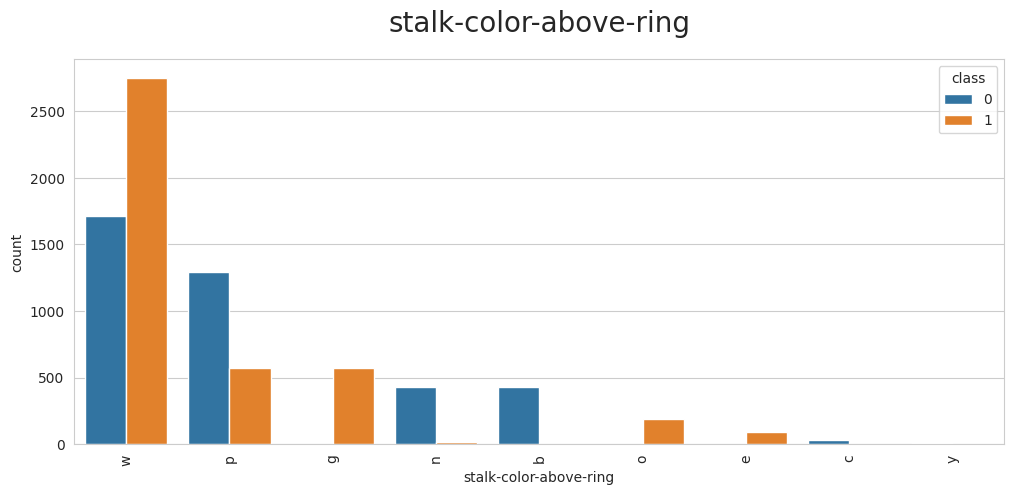

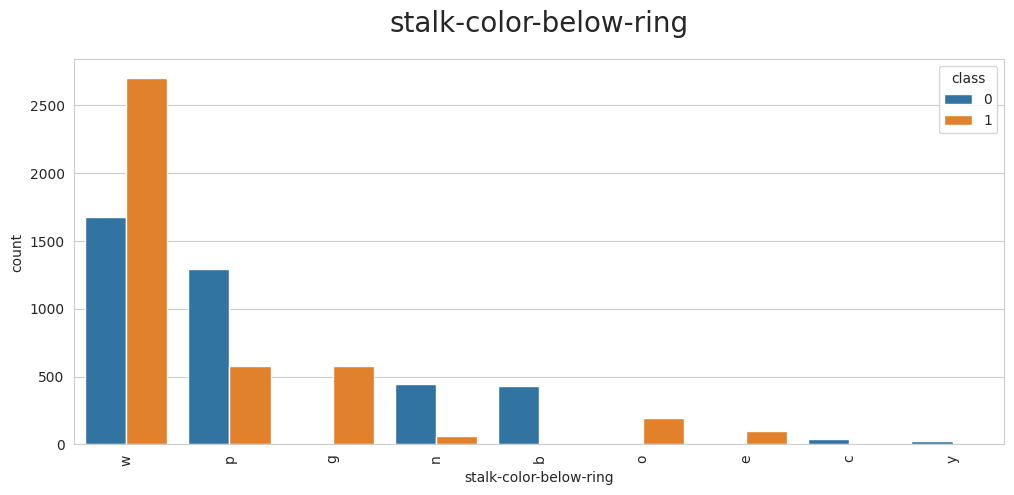

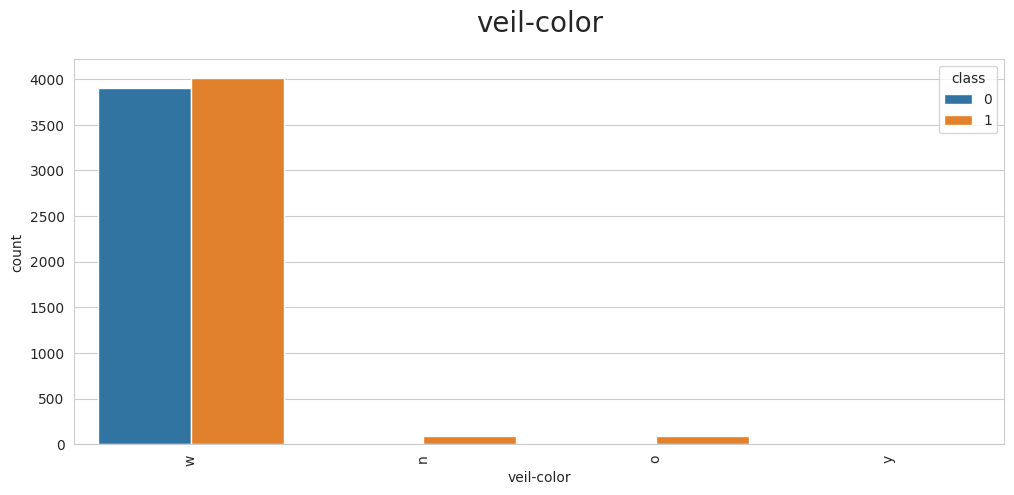

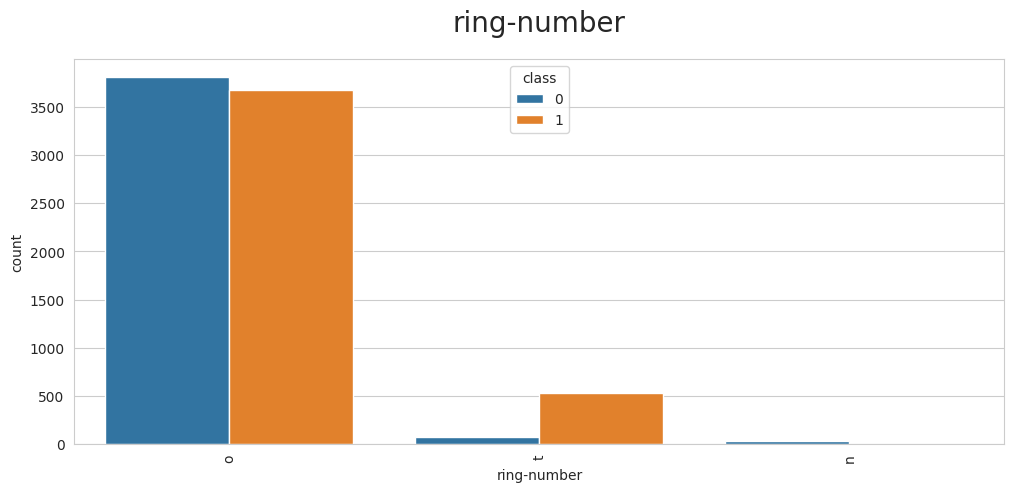

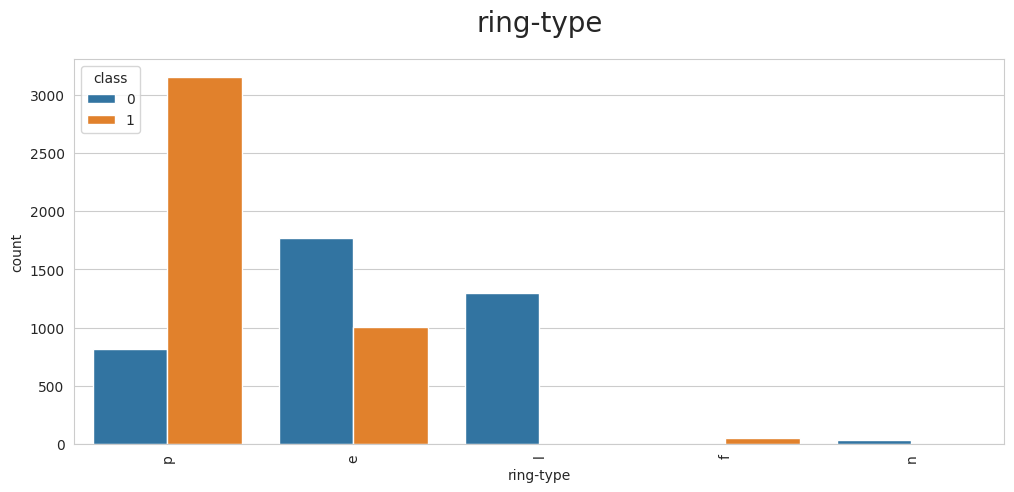

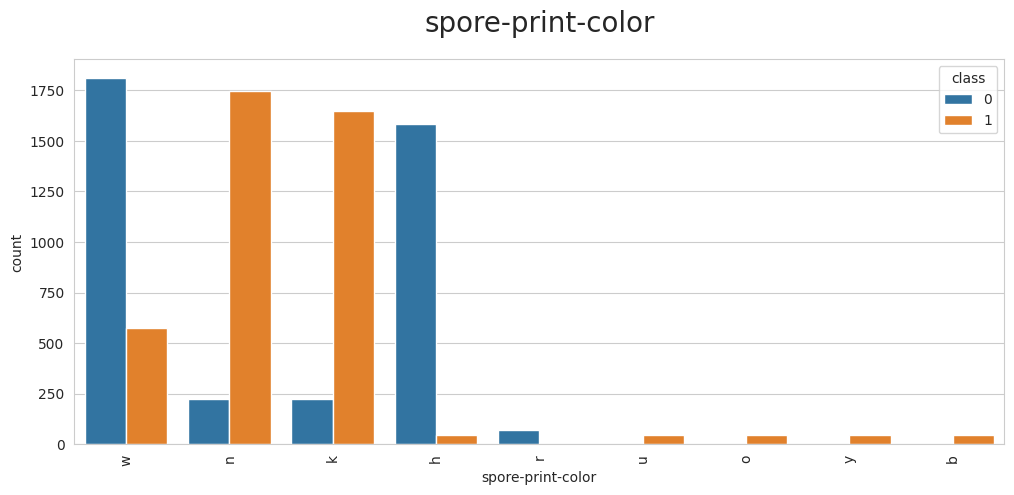

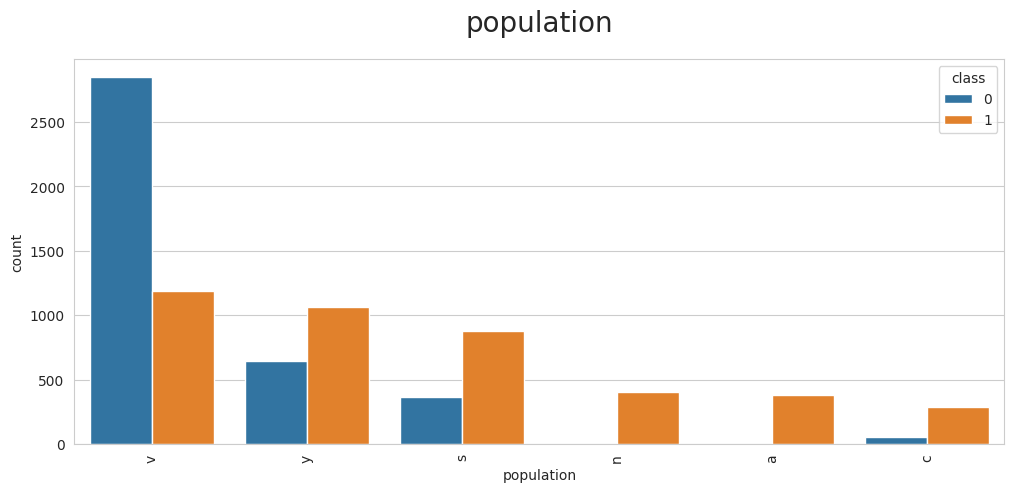

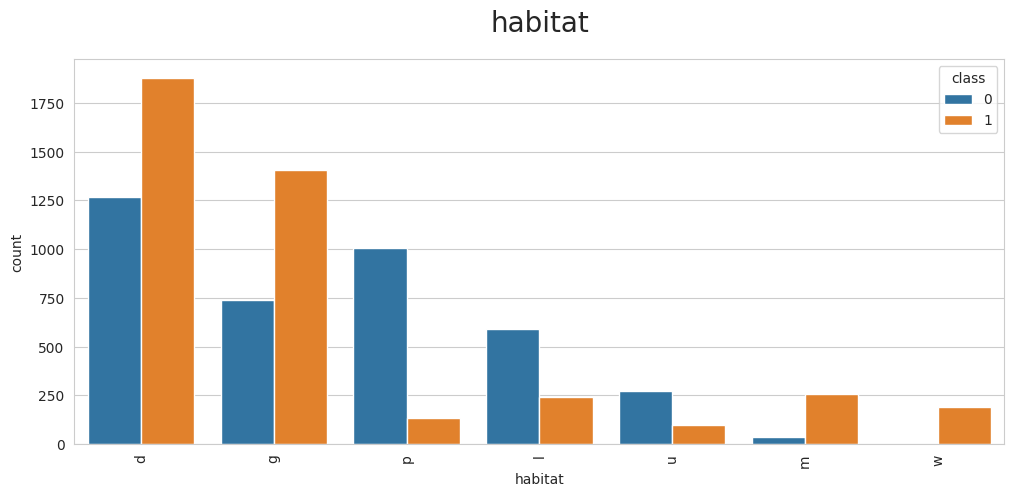

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')


def plot_categorical(df, col, target_var):

    plt.figure(figsize=(12, 5))
    sns.countplot(data=df, x=col, hue=target_var, order=df[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


def plot_numerical(df, col, target_var):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target_var, kde=True, element="step")
    plt.title(f"{col}", fontsize=20, y=1.05)
    plt.show()


target_var = 'class'
for col in vars_to_study:
    if df_eda[col].dtype == 'object':
        plot_categorical(df_eda, col, target_var)
        print("\n\n")
    else:
        plot_numerical(df_eda, col, target_var)
        print("\n\n")

---

## Parellel Plot

Create separate DataFrame to transform `Credit_Limit` from a numerical variable into a binned categorical variable for visualizing on a `parallel_categories()` plot

In [ ]:
from feature_engine.discretisation import ArbitraryDiscretiser
import numpy as np
cred_lim_map = [-np.Inf, 7000, 14000, 21000, 28000, np.Inf]
disc = ArbitraryDiscretiser(binning_dict={'Credit_Limit': cred_lim_map})
df_parallel = disc.fit_transform(df_eda)
df_parallel.head()

In [ ]:
disc.binner_dict_['Credit_Limit']

Create map to replace `Credit_Limit` with more informative levels

In [ ]:
n_classes = len(cred_lim_map) - 1
classes_ranges = disc.binner_dict_['Credit_Limit'][1:-1]

labels_map = {}
for n in range(0, n_classes):
    if n == 0:
        labels_map[n] = f"<{int(classes_ranges[0]/1000)}k"
    elif n == n_classes-1:
        labels_map[n] = f"+{int(classes_ranges[-1]/1000)}k"
    else:
        labels_map[n] = f"{int(classes_ranges[n-1]/1000)}k to {int(classes_ranges[n]/1000)}k"

labels_map

Replace using `.replace()`

In [ ]:
df_parallel['Credit_Limit'] = df_parallel['Credit_Limit'].replace(labels_map)
df_parallel.head()

Creates multi-dimensional categorical data plot

In [ ]:
import plotly.express as px
fig = px.parallel_categories(df_parallel, color="Attrition_Flag")
fig.show()

---

# Conclusions

The correlations and plot interpretations converge to a certain extent, e.g. in the `Marital_Status` plot it can be observed that single customers attrition at a higher rate than married customers, on the `Total_Relationship_Count` plot customers with less relationships attrition at a higher rate than customers with more relationships. However, these correlations are shown to be very weak. The bank would be advised to collect different data that might better predict customer's tendency to attrtion. 

* An attritioned customer typically has a lower credit limit
* An attritioned customer typically has more dependents
* An attritioned customer tends to be female
* An attritioned customer tends to single
* An attritioned customer tends to have less existing relationships with the bank